# Dataset Verification and Augmentation Metrics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.spatial.distance import hamming

# --- Load Dataset ---


In [ ]:
df = pd.read_csv("../data/csv/csi_data_evidence.csv")

# --- Preprocessing ---


In [3]:
def split_sequence(seq):
    return seq.split(',')

df['sequence_list'] = df['evidence_sequence'].apply(split_sequence)

# --- Integrity Checks ---


In [4]:
print("Missing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Missing values per column:
 Participant          0
evidence_sequence    0
experience           0
sequence_list        0
dtype: int64

Data types:
 Participant          float64
evidence_sequence     object
experience            object
sequence_list         object
dtype: object


# Check sequence length consistency


In [5]:
sequence_lengths = df['sequence_list'].apply(len)
print("\nSequence length stats:\n", sequence_lengths.describe())


Sequence length stats:
 count      36.000000
mean      838.666667
std       330.668155
min       203.000000
25%       595.250000
50%       825.500000
75%       982.750000
max      1708.000000
Name: sequence_list, dtype: float64


# Unique Participants


In [6]:
print("\nNumber of unique participants:", df['Participant'].nunique())


Number of unique participants: 36


# --- Descriptive Statistics ---

# Class distribution


In [7]:
print("\nExperience distribution:\n", df['experience'].value_counts())


Experience distribution:
 experience
Control      9
FirstYear    9
ThirdYear    9
CSI          9
Name: count, dtype: int64


# Flatten all sequences and count Yes/No


In [8]:
all_responses = [item for sublist in df['sequence_list'].tolist() for item in sublist]
overall_counter = Counter(all_responses)
print("\nOverall 'Yes'/'No' counts:\n", overall_counter)


Overall 'Yes'/'No' counts:
 Counter({'No': 19145, 'Yes': 11046, 'nan': 1})


# Yes count per sequence


In [9]:
df['yes_count'] = df['sequence_list'].apply(lambda seq: seq.count('Yes'))
print("\nAverage 'Yes' per sequence:", df['yes_count'].mean())


Average 'Yes' per sequence: 306.8333333333333


# Yes/No per position heatmap


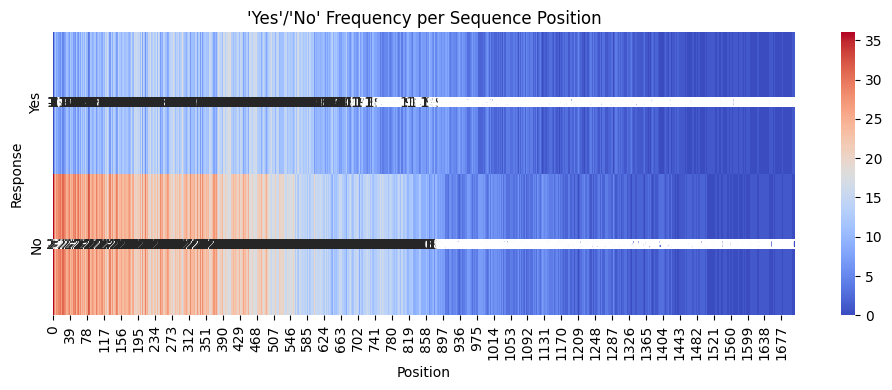

In [10]:
max_len = max(sequence_lengths)
sequence_matrix = np.array([seq + [None]*(max_len - len(seq)) for seq in df['sequence_list']])
positional_counts = pd.DataFrame(sequence_matrix).apply(lambda col: col.value_counts(), axis=0).fillna(0)

plt.figure(figsize=(10, 4))
sns.heatmap(positional_counts.loc[['Yes', 'No']], annot=True, fmt=".0f", cmap="coolwarm")
plt.title("'Yes'/'No' Frequency per Sequence Position")
plt.xlabel("Position")
plt.ylabel("Response")
plt.tight_layout()
plt.show()



--- Comparing experience level: Control ---
Original count: 9, Augmented count: 64
Original mean 'Yes': 321.44, Augmented mean 'Yes': 22.34


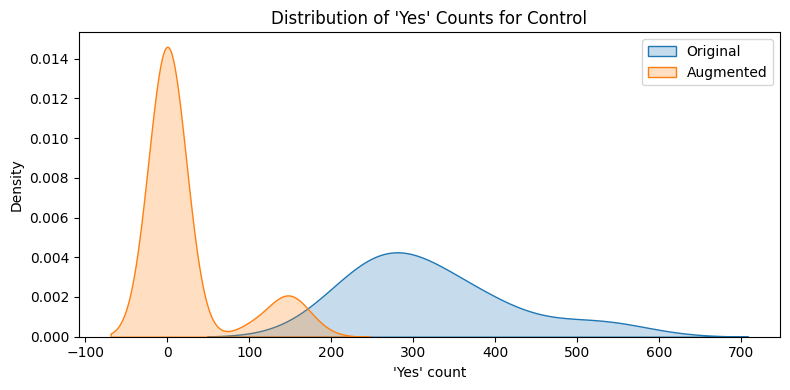


--- Comparing experience level: FirstYear ---
Original count: 9, Augmented count: 62
Original mean 'Yes': 289.22, Augmented mean 'Yes': 19.32


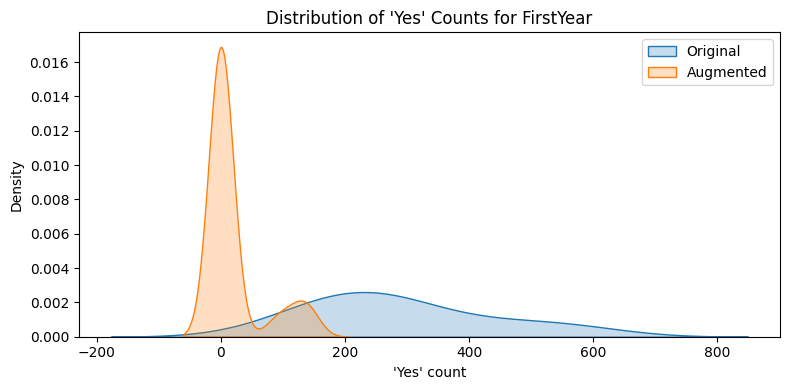


--- Comparing experience level: ThirdYear ---
Original count: 9, Augmented count: 64
Original mean 'Yes': 316.00, Augmented mean 'Yes': 22.00


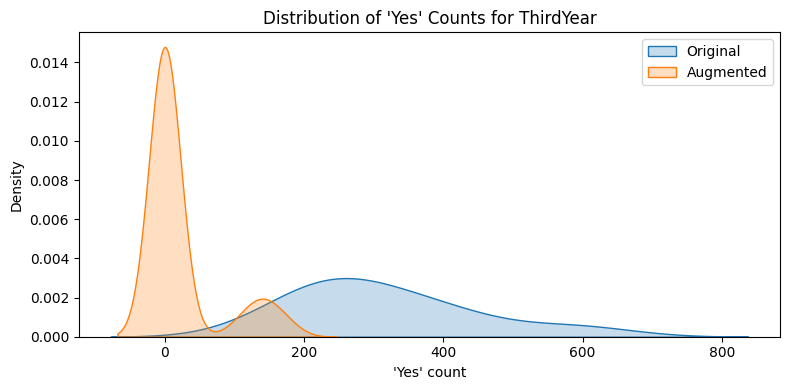


--- Comparing experience level: CSI ---
Original count: 9, Augmented count: 64
Original mean 'Yes': 300.67, Augmented mean 'Yes': 18.12


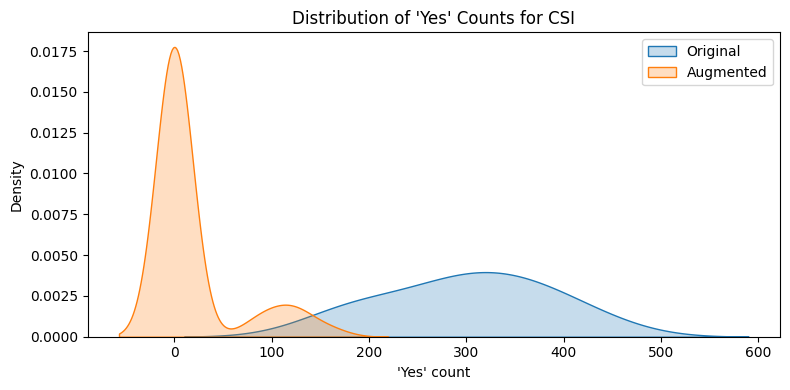

In [11]:
# --- Augmentation Metrics ---
# Load Augmented Dataset
# (Make sure to update the path if different)
augmented_df = pd.read_csv("../data/csv/ROIs/Analysis/csi_data_evidence_augmented.csv")
augmented_df['sequence_list'] = augmented_df['evidence_sequence'].apply(split_sequence)
augmented_df['yes_count'] = augmented_df['sequence_list'].apply(lambda seq: seq.count('Yes'))

# Compare per experience level
def compare_experience_groups(original, augmented):
    experiences = original['experience'].unique()
    for exp in experiences:
        print(f"\n--- Comparing experience level: {exp} ---")
        orig_group = original[original['experience'] == exp]
        aug_group = augmented[augmented['experience'] == exp]

        print(f"Original count: {len(orig_group)}, Augmented count: {len(aug_group)}")
        print(f"Original mean 'Yes': {orig_group['yes_count'].mean():.2f}, Augmented mean 'Yes': {aug_group['yes_count'].mean():.2f}")

        # Visual comparison
        plt.figure(figsize=(8, 4))
        sns.kdeplot(orig_group['yes_count'], label='Original', fill=True)
        sns.kdeplot(aug_group['yes_count'], label='Augmented', fill=True)
        plt.title(f"Distribution of 'Yes' Counts for {exp}")
        plt.xlabel("'Yes' count")
        plt.ylabel("Density")
        plt.legend()
        plt.tight_layout()
        plt.show()

# Run the comparison
compare_experience_groups(df, augmented_df)